# Karine Gevorgyan

## Homework 2

### About data:

About the data: data set has Autistic Spectrum Disorder (ASD) Screening Test Data for 704 adults and has 21 attributes including test takers’ demographics. It also has 10 questions that test takers answered in screening tests. The status of a test taker on ASD is determined and recorded under the Class/ASD variable. Goal is using visualization techniques analyze and find patterns in the data related to Autistic Spectrum Disorder.

* 1: a1_score -- Answer to Question 1, ranges from 0-1.
* 2: a2_score -- Answer to Question 2, ranges from 0-1.
* 3: a3_score -- Answer to Question 3, ranges from 0-1.
* 4: a4_score -- Answer to Question 4, ranges from 0-1.
* 5: a5_score -- Answer to Question 5, ranges from 0-1.
* 6: a6_score -- Answer to Question 6, ranges from 0-1.
* 7: a7_score -- Answer to Question 7, ranges from 0-1.
* 8: a8_score -- Answer to Question 8, ranges from 0-1.
* 9: a9_score -- Answer to Question 9, ranges from 0-1.
* 10: a10_score -- Answer to Question 10, ranges from 0-1.

* 11: age_in_years -- age in years, float
* 12: gender -- gender of participant ( m(Male), f(female))
* 13: ethnicity -- List of common ethnicities (White-European, Latino, Others, Qualitative Black, Asian, Middle Eastern, Pasifika, South Asian, Hispanic, Turkish)
* 14: jundice -- Whether the case was born with Jundice (Yes, No)
* 15: austim -- Whether any immediate family member has a PDD (Yes, No)
* 16: country_of_residence -- Country of residence (List of countries)
* 17: used_app_before -- Whether the user has used the screening app before (Yes, No)
* 18: result -- Screening score: The final score obtained based on the scoring algorithm of the screening method used. 
* 19: Age description ('18 or more')
* 20: relation -- Who is completing the test (Self, Parent, Health care professional, Relative, etc)
* 21: class -- whether the participant has ASD (Yes, No)

In [48]:
!pip install arff

In [49]:
import pandas as pd
import arff

import matplotlib.pyplot as plt
import seaborn as sns

In [50]:
# Load the ARFF file using the loadarff function from the liac-arff library
# data = arff.load(open('ASD_screening.arff', 'r'))['data']
# Convert the ARFF data to a Pandas DataFrame

# df = pd.DataFrame(data)
df =pd.read_csv("ASD_screening.csv")

# Print the DataFrame
print(df.head())

   A1_Score  A2_Score  A3_Score  A4_Score  A5_Score  A6_Score  A7_Score  \
0         1         1         1         1         0         0         1   
1         1         1         0         1         0         0         0   
2         1         1         0         1         1         0         1   
3         1         1         0         1         0         0         1   
4         1         0         0         0         0         0         0   

   A8_Score  A9_Score  A10_Score  ...  gender       ethnicity jundice austim  \
0         1         0          0  ...       f  White-European      no     no   
1         1         0          1  ...       m          Latino      no    yes   
2         1         1          1  ...       m          Latino     yes    yes   
3         1         0          1  ...       f  White-European      no    yes   
4         1         0          0  ...       f             NaN      no     no   

   contry_of_res used_app_before result     age_desc relation Class/

In [51]:
df.info()
# After running df.info() we see that column 12 and 19 have only 609 non-null values, 
# while many others have 704. this indic
# ates presense of null values in our dataframe.


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 704 entries, 0 to 703
Data columns (total 21 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   A1_Score         704 non-null    int64  
 1   A2_Score         704 non-null    int64  
 2   A3_Score         704 non-null    int64  
 3   A4_Score         704 non-null    int64  
 4   A5_Score         704 non-null    int64  
 5   A6_Score         704 non-null    int64  
 6   A7_Score         704 non-null    int64  
 7   A8_Score         704 non-null    int64  
 8   A9_Score         704 non-null    int64  
 9   A10_Score        704 non-null    int64  
 10  age              702 non-null    float64
 11  gender           704 non-null    object 
 12  ethnicity        609 non-null    object 
 13  jundice          704 non-null    object 
 14  austim           704 non-null    object 
 15  contry_of_res    704 non-null    object 
 16  used_app_before  704 non-null    object 
 17  result          

In [52]:
# Let's drop null values from our dataset
df.dropna(inplace=True)
df.info()
df.dtypes
df.head()
df["jundice"].unique()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 609 entries, 0 to 703
Data columns (total 21 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   A1_Score         609 non-null    int64  
 1   A2_Score         609 non-null    int64  
 2   A3_Score         609 non-null    int64  
 3   A4_Score         609 non-null    int64  
 4   A5_Score         609 non-null    int64  
 5   A6_Score         609 non-null    int64  
 6   A7_Score         609 non-null    int64  
 7   A8_Score         609 non-null    int64  
 8   A9_Score         609 non-null    int64  
 9   A10_Score        609 non-null    int64  
 10  age              609 non-null    float64
 11  gender           609 non-null    object 
 12  ethnicity        609 non-null    object 
 13  jundice          609 non-null    object 
 14  austim           609 non-null    object 
 15  contry_of_res    609 non-null    object 
 16  used_app_before  609 non-null    object 
 17  result          

array(['no', 'yes'], dtype=object)

In [53]:
# Let's explore the values our columns can take
for i in range(21):
    print(str(i)+ '   '+ str(df.iloc[:,i].unique())+' type:'+str(df.iloc[:,i].dtype))
# We see that many columns are boolean but have type object

0   [1 0] type:int64
1   [1 0] type:int64
2   [1 0] type:int64
3   [1 0] type:int64
4   [0 1] type:int64
5   [0 1] type:int64
6   [1 0] type:int64
7   [1 0] type:int64
8   [0 1] type:int64
9   [0 1] type:int64
10   [ 26.  24.  27.  35.  36.  17.  64.  29.  33.  18.  31.  30.  42.  40.
  48.  37.  55.  50.  34.  53.  20.  28.  21. 383.  47.  43.  32.  44.
  19.  58.  22.  39.  25.  23.  38.  54.  60.  41.  46.  45.  56.  61.
  59.  52.  49.  51.] type:float64
11   ['f' 'm'] type:object
12   ['White-European' 'Latino' 'Others' 'Black' 'Asian' 'Middle Eastern '
 'Pasifika' 'South Asian' 'Hispanic' 'Turkish' 'others'] type:object
13   ['no' 'yes'] type:object
14   ['no' 'yes'] type:object
15   ['United States' 'Brazil' 'Spain' 'New Zealand' 'Bahamas' 'Burundi'
 'Jordan' 'Ireland' 'United Arab Emirates' 'Afghanistan' 'United Kingdom'
 'South Africa' 'Italy' 'Pakistan' 'Egypt' 'Bangladesh' 'Chile' 'France'
 'China' 'Australia' 'Canada' 'Saudi Arabia' 'Netherlands' 'Romania'
 'Sweden' 'Tonga'

In [54]:
# Convert the relevant columns to boolean
for col in df.columns:
    if set(df[col]) == {'yes', 'no'}:
        df[col] = df[col].replace({'yes':True,'no':False})
    elif set(df[col]) == {'YES', 'NO'}:
        df[col] = df[col].replace({'YES':True,'NO':False})
    elif set(df[col]) == {'0','1'}:
        df[col] = df[col].replace({'1':True,'0':False})
print(df.dtypes)

A1_Score             int64
A2_Score             int64
A3_Score             int64
A4_Score             int64
A5_Score             int64
A6_Score             int64
A7_Score             int64
A8_Score             int64
A9_Score             int64
A10_Score            int64
age                float64
gender              object
ethnicity           object
jundice               bool
austim                bool
contry_of_res       object
used_app_before       bool
result               int64
age_desc            object
relation            object
Class/ASD             bool
dtype: object


In [55]:
df.head(2)

,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,...,gender,ethnicity,jundice,austim,contry_of_res,used_app_before,result,age_desc,relation,Class/ASD
0,1,1,1,1,0,0,1,1,0,0,...,f,White-European,False,False,United States,False,6,18 and more,Self,False
1,1,1,0,1,0,0,0,1,0,1,...,m,Latino,False,True,Brazil,False,5,18 and more,Self,False


In [56]:
# The column 18 only has 1 value, '18 and more',(regarding age) let's make sure that is the case
print(len(df[df.iloc[:,10]<18]))
# We see there is a number of columns that hase age 17, but age description of 18 and more
# This is a contradiction


14


In [57]:
# Let's drop all rows with age less than 18
df=df[df.loc[:,"age"]>=18]
df.info()
# We see that 14 rows were dropped

<class 'pandas.core.frame.DataFrame'>
Int64Index: 595 entries, 0 to 703
Data columns (total 21 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   A1_Score         595 non-null    int64  
 1   A2_Score         595 non-null    int64  
 2   A3_Score         595 non-null    int64  
 3   A4_Score         595 non-null    int64  
 4   A5_Score         595 non-null    int64  
 5   A6_Score         595 non-null    int64  
 6   A7_Score         595 non-null    int64  
 7   A8_Score         595 non-null    int64  
 8   A9_Score         595 non-null    int64  
 9   A10_Score        595 non-null    int64  
 10  age              595 non-null    float64
 11  gender           595 non-null    object 
 12  ethnicity        595 non-null    object 
 13  jundice          595 non-null    bool   
 14  austim           595 non-null    bool   
 15  contry_of_res    595 non-null    object 
 16  used_app_before  595 non-null    bool   
 17  result          

In [58]:
df

,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,...,gender,ethnicity,jundice,austim,contry_of_res,used_app_before,result,age_desc,relation,Class/ASD
0,1,1,1,1,0,0,1,1,0,0,...,f,White-European,False,False,United States,False,6,18 and more,Self,False
1,1,1,0,1,0,0,0,1,0,1,...,m,Latino,False,True,Brazil,False,5,18 and more,Self,False
2,1,1,0,1,1,0,1,1,1,1,...,m,Latino,True,True,Spain,False,8,18 and more,Parent,True
3,1,1,0,1,0,0,1,1,0,1,...,f,White-European,False,True,United States,False,6,18 and more,Self,False
5,1,1,1,1,1,0,1,1,1,1,...,m,Others,True,False,United States,False,9,18 and more,Self,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
698,1,1,1,1,1,1,1,1,1,1,...,f,Pasifika,False,False,Australia,False,10,18 and more,Self,True
699,0,1,0,1,1,0,1,1,1,1,...,f,White-European,False,False,Russia,False,7,18 and more,Self,True
700,1,0,0,0,0,0,0,1,0,1,...,m,Hispanic,False,False,Mexico,False,3,18 and more,Parent,False
702,1,0,0,1,1,0,1,0,1,1,...,m,South Asian,False,False,Pakistan,False,6,18 and more,Self,False


In [59]:
#Other then what we did above, age desciprion does us no good, let's drop it
df=df.drop(18, axis=1)
print(df.head())

KeyError: '[18] not found in axis'

In [61]:
# Let's rename the columns to appropriate attributes, so that it's easier to work with the data

for i in range(10):
    df.rename(columns={df.columns[i]: 'a' + str(i+1) + '_score'}, inplace=True)
attr = {
    10: 'age_in_years',
    11: 'gender',
    12: 'ethnicity',
    13: 'jundice',
    14: 'austim',
    15: 'country_of_residence',
    16: 'used_app_before',
    17: 'result',
    19: 'relation',
    20:"class"
    }
for (key, value) in attr.items():
    df.rename(columns={df.columns[key]: value}, inplace=True)
print(df.head())


   a1_score  a2_score  a3_score  a4_score  a5_score  a6_score  a7_score  \
0         1         1         1         1         0         0         1   
1         1         1         0         1         0         0         0   
2         1         1         0         1         1         0         1   
3         1         1         0         1         0         0         1   
5         1         1         1         1         1         0         1   

   a8_score  a9_score  a10_score  ...  gender       ethnicity jundice  austim  \
0         1         0          0  ...       f  White-European   False   False   
1         1         0          1  ...       m          Latino   False    True   
2         1         1          1  ...       m          Latino    True    True   
3         1         0          1  ...       f  White-European   False    True   
5         1         1          1  ...       m          Others    True   False   

   country_of_residence used_app_before  result     age_desc r

In [ ]:
# Let's define some palettes that we will use later in our visualizations
genderColors = [ "#f2b5b3", "#91aef2"]
falseTrueColors = ['#f57171', '#c9f0d9']
pastels=["#ace7fa","#c1f7c6","#f6d7fc","#fcd7e6", "#f0e5af"]

In [ ]:
# Let's use pie charts to get an insight of the demographics of our participants

plt.figure(figsize=(20,10))
counts = df['relation'].value_counts()
print(len(counts))
print(df['relation'].dropna().unique())
plt.title("Relation of test-passer to participant")
plt.pie(counts, labels=df['relation'].dropna().unique(), colors=pastels)
plt.show()
# We see that most of the participants passed the test by themselves

In [ ]:
counts = df['country_of_residence'].value_counts()
print(df['country_of_residence'].nunique())
plt.pie(counts)
plt.legend(labels=df["country_of_residence"].unique(), loc='upper left', 
           bbox_to_anchor=(0.5, 1), ncol=10)

plt.title("Country of residence")
plt.show()
# Most participants are from Unites States, Brazil, Spain, New Zealand, Burundi and Jordan
# Other than this info, this column is useless for us

In [ ]:
counts = df['ethnicity'].value_counts()
print(counts)
print(df["ethnicity"].isna().sum())
plt.pie(counts)
plt.legend(labels=df["ethnicity"].unique(), loc='upper left', ncol=11)

plt.title("Ethnicities")
plt.show()
# We see that there are two colors one for other ethnicities. One for 'others' and one for 'Others'. Let's fix this

In [ ]:
df["ethnicity"]=df["ethnicity"].replace("others","Others")
plt.pie(counts)
print(df["ethnicity"].value_counts())
plt.legend(labels=df["ethnicity"].unique(), loc='upper left', 
           bbox_to_anchor=(0.5, -0.04), ncol=11)

plt.title("Ethnicities")
plt.show()
# Now everything is ok and we see that most participants are from of White-European, Latino, Middle or Other ethnicities

In [ ]:
counts = df['gender'].value_counts()

plt.pie(counts, colors=genderColors)
plt.legend(labels=df["gender"].unique(), loc='upper left')

plt.title("Genders")
plt.show()
# Almost equal number of female and male participants

In [ ]:
counts = df['used_app_before'].value_counts()

plt.pie(counts, colors=falseTrueColors)
plt.legend(labels=df["used_app_before"].unique(), loc='upper left')

plt.title("Used App Before")
plt.show()
# Most participants haven't used the app before
# Other than this info, this column is useless for us, becuase using screening app cannot impact having ASD

In [ ]:
# Now let's try to get a general understanding of relationships between the variables
# For that, we will, of course, use a heatmap
plt.figure(figsize=(20,10))
sns.heatmap(df.select_dtypes(exclude=['object']).astype('float').corr(), cmap="PuBu", annot=True, fmt='.2%')
plt.show()
# We see that there is some correlation among the different questions (a1-a10).
# For example between a3 and a4, a5 and a4 and a6
# There is a very strong correlation between result and class

<Figure size 2000x1000 with 0 Axes>

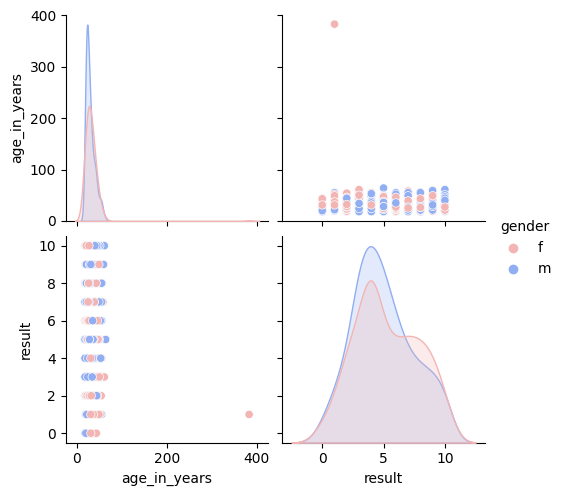

In [62]:
# Age and result are our only numerical variables. Let's try to visualize their relationship through a pairplot
plt.figure(figsize=(20,10))
figure=sns.pairplot(df, vars=['age_in_years', 'result'], hue="gender", palette = genderColors);
plt.show(figure)
# We have an outlier in age, which has an abnormal value. This also spoils the visualization
# This is a sign that we have more cleaning to do

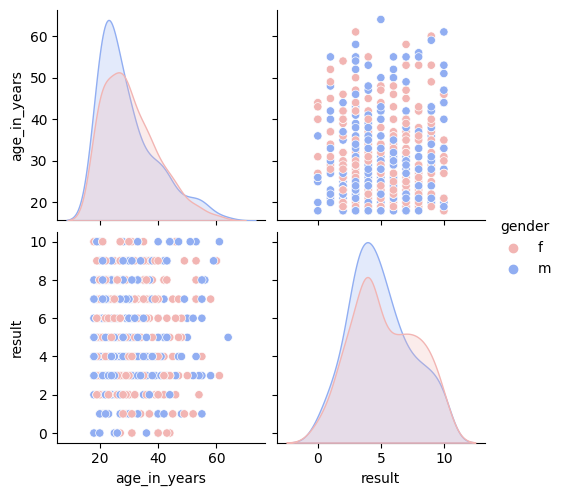

In [64]:
df= df[df['age_in_years']<= 100]
figure=sns.pairplot(df, vars=['age_in_years', 'result'], hue="gender", palette=genderColors);
plt.show(figure)
# Now the plot looks better and more informative and we see that 
# 1) There is no linaer relationship between age and result, which was also apparent from heatmap
# 2) In average male participans
#       a) are younger than female participans
#       b) have similar results with female participants

In [ ]:
# Let's show previous results better, using boxplot
genderColors = [ "#f2b5b3", "#91aef2"]
plt.figure(figsize=(5,3))
sns.boxplot(data=df, x='gender', y='age_in_years', palette=genderColors)
plt.xlabel("Gender")
plt.ylabel('Age (years)')
plt.show()
# From here we  it is easier to determine that in our data
# . average age for women is around 29
# . average age for men is around 25
# . almost all participants are younger than 60 years old

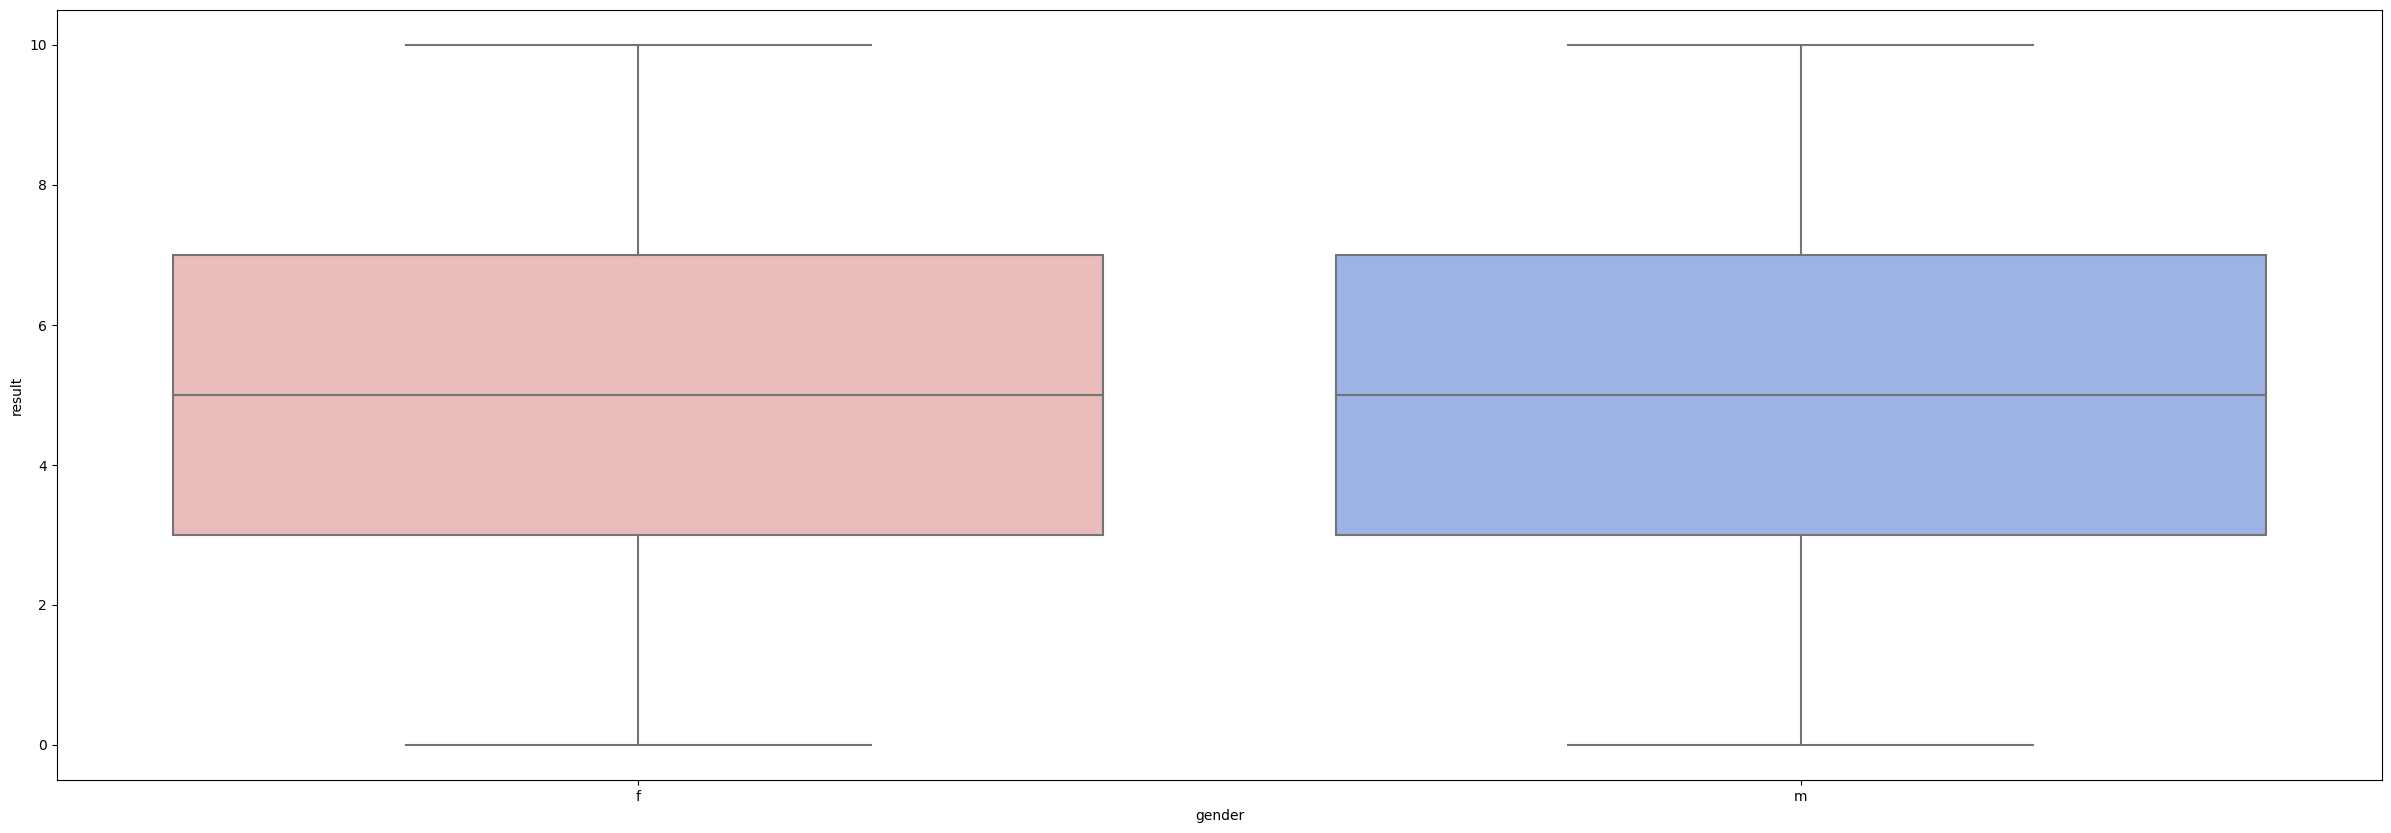

In [65]:
# Here are the boxplot that show howo result is same between genders
plt.figure(figsize=(30,10))
sns.boxplot(data=df, y="result", x="gender", palette=genderColors)
plt.show()

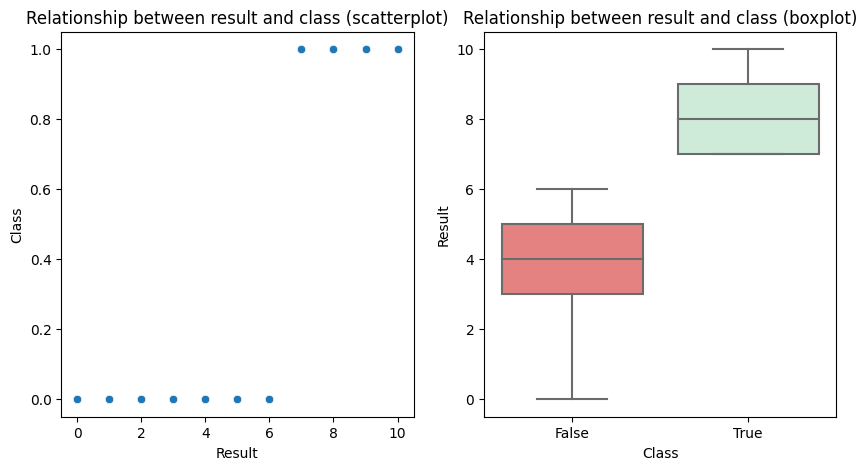

In [69]:
# Now let's try to see if their is a relationship between result and class
plt.figure(figsize=(10,5))
plt.subplot(1, 2, 1)
plt.title('Relationship between result and class (scatterplot)')
sns.scatterplot(x="result", y="class", data=df)
plt.xlabel("Result")
plt.ylabel('Class')

plt.subplot(1, 2, 2)
plt.title('Relationship between result and class (boxplot)')
sns.boxplot(data=df, x='class', y='result', palette=falseTrueColors)
plt.xlabel("Class")
plt.ylabel('Result')
plt.show()

# We visualized this in 2 ways. With a scatterplot and boxplot, both of which show 1 thing, 
# if the result is biger than 6, the participant has ASD

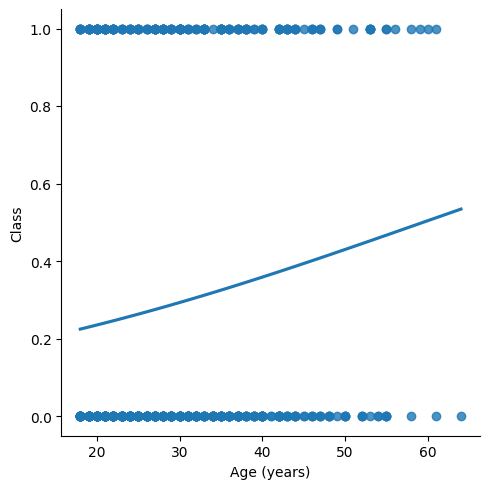

In [73]:
# Now let's try to see if their is a relationship between age and class
# Create scatterplot with a logistic regression graph
sns.lmplot(x="age_in_years", y="class", data=df, logistic=True, ci=True)
plt.xlabel('Age (years)')
plt.ylabel('Class')
plt.show()
# We see that the bigger the age the bigger the class (as per the graph)
# While the graph is not too steep, it is steadily increasing, this means that the impact of age on result
# is not very big, but it is present and we can claim that the older the participant,
# the more likely for them to have ASD

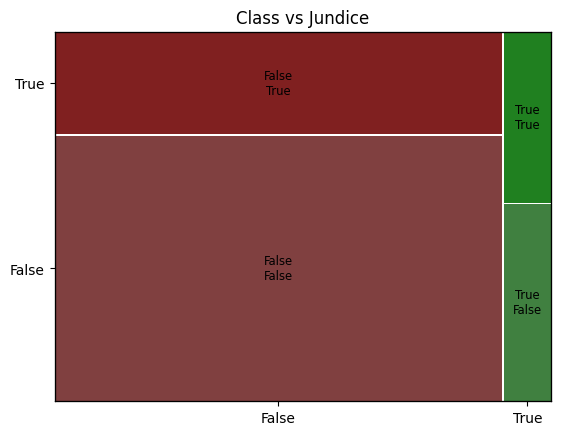

In [74]:
# Let's import a new type of plot for visualizing dependencies among binary variables
from statsmodels.graphics.mosaicplot import mosaic
mosaic(df, ['jundice','class'], title="Class vs Jundice")
plt.show()

# We constructed a mosaic plot to compare jundice and class. We see that most participants were not born with jundice.
# Also we see that if a participant is not born with jundice, it is less likely for them to have ASD

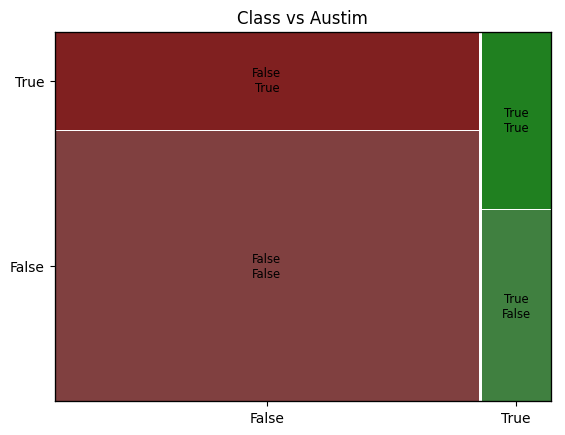

In [75]:
mosaic(df, ['austim', 'class'], title="Class vs Austim")
plt.show()

# We constructed another mosaic plot, this time to compare austim and class.
# We see that most participants' immediate family members do not have a PDD
# Also we see that if a participant's immediate family does not have a PDD, it is less likely for them to have ASD

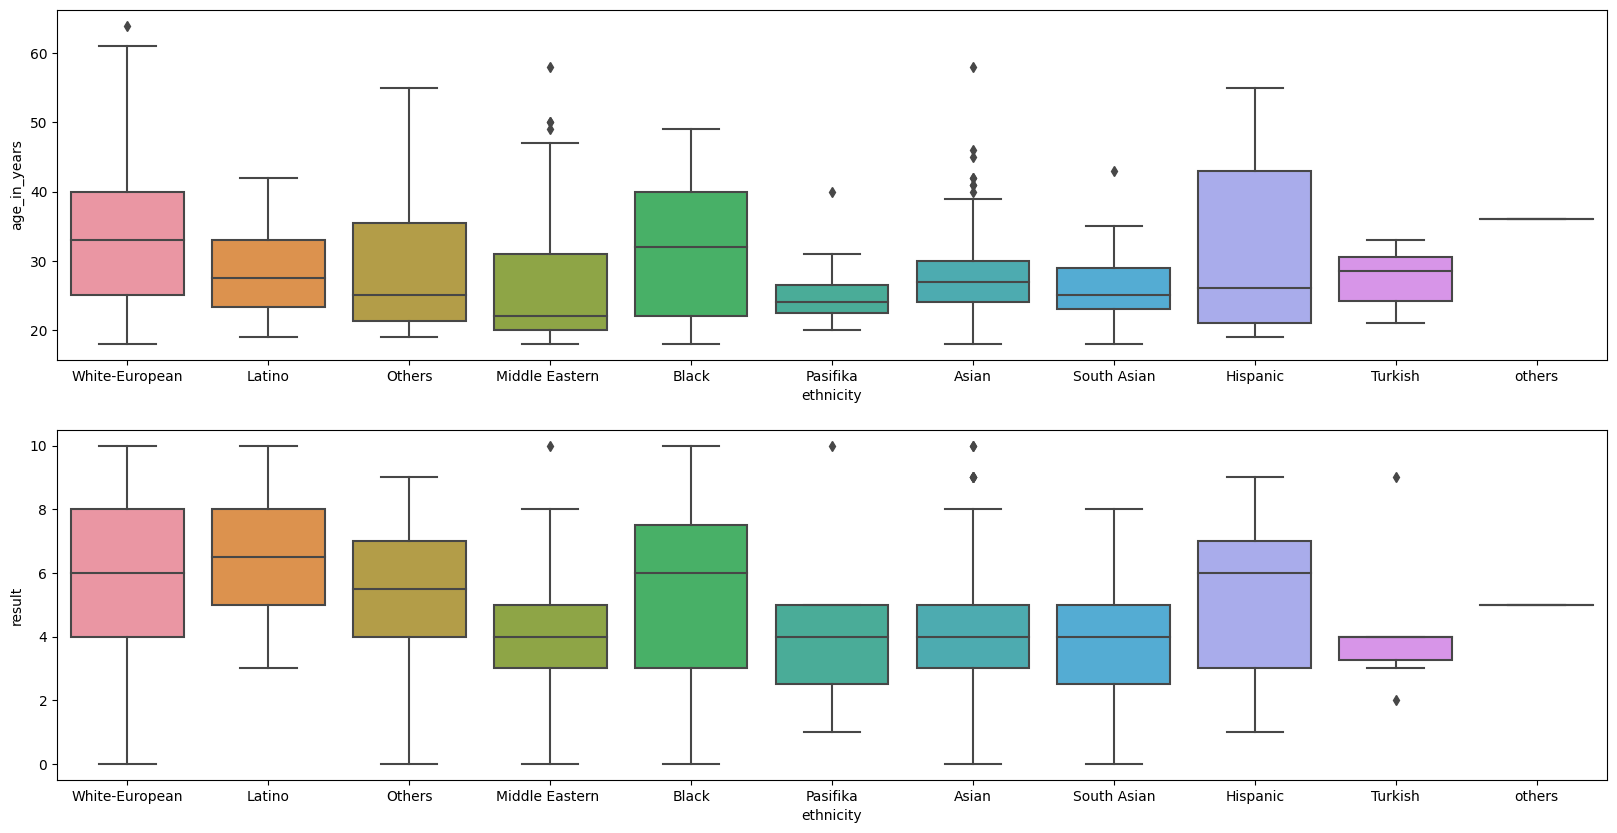

In [76]:
# Now, let's try to compare age and results based on ethnicity
plt.figure(figsize=(20,10))
plt.subplot(2,1,1)
sns.boxplot(data=df, x='ethnicity', y='age_in_years')
plt.subplot(2,1,2)
sns.boxplot(data=df, x='ethnicity', y='result')
plt.show()


# We do this because we already know there is a relationship between age and result(although not linear),
# we do not want this impact our analysis and drive us to false conclusion that result is higher for an ethnicity,
# when in reality the case is just that the participants of this ethnicity are older.
# This is why we analyze both graphs together
# For most ethnicities we can claim that (roughly) the higher the age, the higher the result
# However, this is not the case for latino and hispanic people. Although the age boxplots for these are lower than
# many others, the opposite is true for result boxplots
# Of course, only a hypothesis can be made out of this, which has to be invesigated and confirmed later, but it seems
# latino and hispanic ethnicities are more likely to be diagnosed of ASD based on our data

# Summary

## Demographics
1. Most of the participants passed the test by themselves
2. Most participants are from Unites States, Brazil, Spain, New Zealand, Burundi and Jordan
3. Most participants are from of White-European, Latino, Middle or Other ethnicities
4. Most participants were not born with jundice.
5. Most participants' immediate family members do not have a PDD
6. The number of male and female participants is almost equal
7. Most participants haven't used the app before

## Relationships
1. There is between age and class. The older the participant, the more likely for them to have ASD
2. The test result can be used to determine the class. If the result is larger than 6, then the patient has ASD
(Although there is relationship between age and class, and result and class, there is no linear relationship between  result and age (can you, please, explain why in the feedback)
3. In average male participans are younger(mean around 25) than female participans(mean around 29)
4. Test results do not depend on gender
5. If a participant is not born with jundice, it is less likely for them to have ASD
6. If a participant's immediate family does not have a PDD, it is less likely for them to have ASD
7. People of Latino and Hispanic ethnicities are more likely to be diagnosed with ASD